In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Data Science/Dataset/Credit Risk/credit_risk_dataset.csv')

In [3]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# EDA and Pre-Processing

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss
nm= NearMiss()
le=LabelEncoder()
sc=StandardScaler()

In [5]:
df.shape

(32581, 12)

There are 32581 rows and 12 columns in the data.The data is sufficient for creating a predictive classification model.

In [6]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

We would delete the missing values as there is enough rows to delete the data.

In [7]:
df=df.dropna()

In [8]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [9]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


1) The data is collected from the age group of 20-144.We can clearly say there are outliers in the 'person_age' column as the age of 144 is still unachieveable.

2)The average loan amount took is 9656 dollars and the highest and the highest amount of loan took is 35000 and the lowest is 500 dollars.

3)For the majority data the loan amount is around 0.15% of their icome.

4) The credit history of the people in the dataset ranges from 2$-30$.

<Axes: xlabel='count', ylabel='person_home_ownership'>

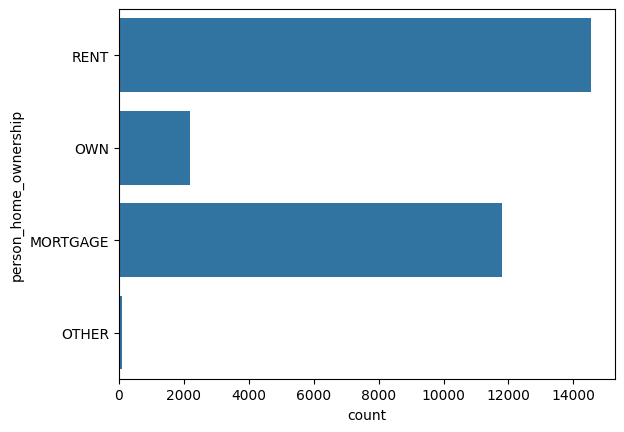

In [10]:
sns.countplot(df['person_home_ownership'])

The data shows that most of the people have there houses on rent and the second most people in the dataset have their houses mortgaged.

<Axes: xlabel='count', ylabel='cb_person_default_on_file'>

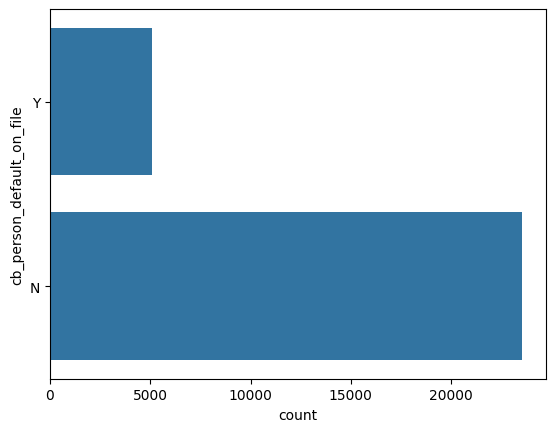

In [11]:
sns.countplot(df['cb_person_default_on_file'])

Most of the people have not defaulted historically but there are around 5000-5500 people who have defaulted historically.

<Axes: ylabel='person_age'>

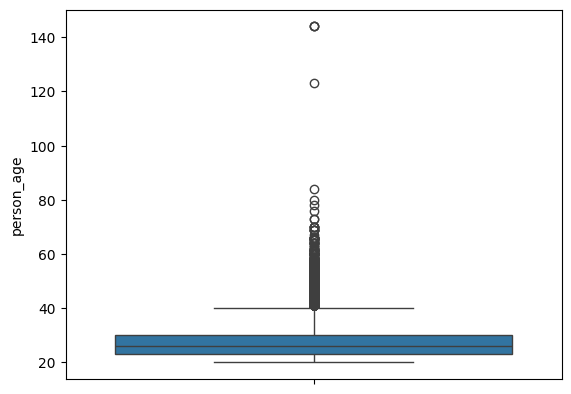

In [12]:
sns.boxplot(df['person_age'])

There are many outliers in the data but we would remove all the people above the age of 80 as most of this people are either added by mistakely and also they would have a bad credit rating.

<Axes: xlabel='count', ylabel='loan_intent'>

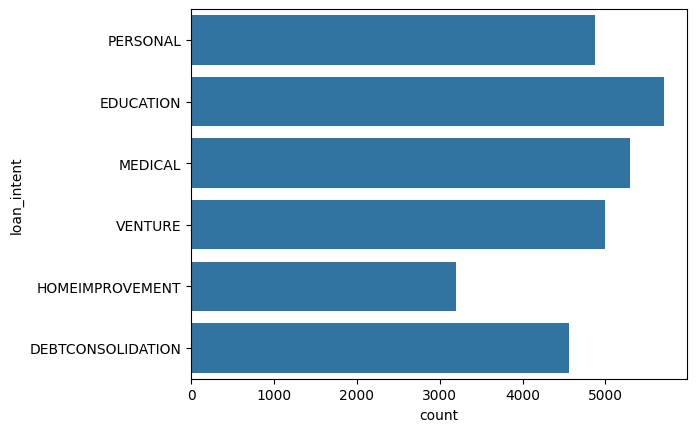

In [13]:
sns.countplot(df['loan_intent'])

People have took loan for many purposes such as Education,Medical,Business,Debt Reconstruction etc.

<Axes: xlabel='count', ylabel='loan_grade'>

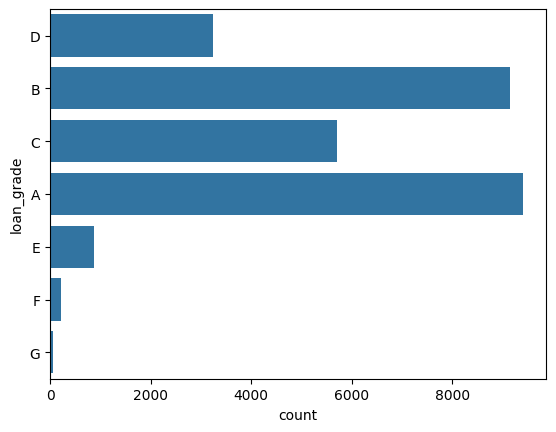

In [14]:
sns.countplot(df['loan_grade'])

The highest loan taken are of 'A' grade and 'B' grade.

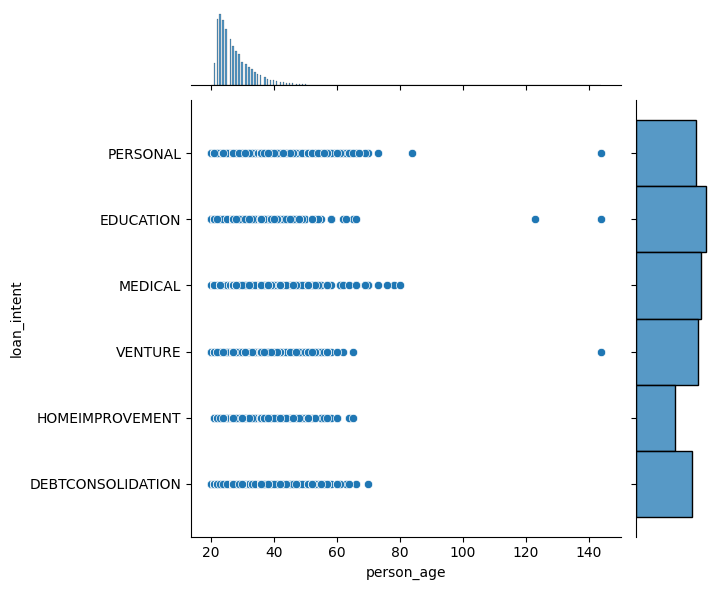

In [15]:
sns.jointplot(data=df,y='loan_intent',x='person_age')

From the above plot we can say that the intent of taking the loan has no direct co-realtion with the age of the person.

In [16]:
df[df['person_age']>80]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24


We would drop this 4 columns.

In [17]:
df = df.drop(df[df['person_age'] > 80].index)

<Axes: ylabel='person_income'>

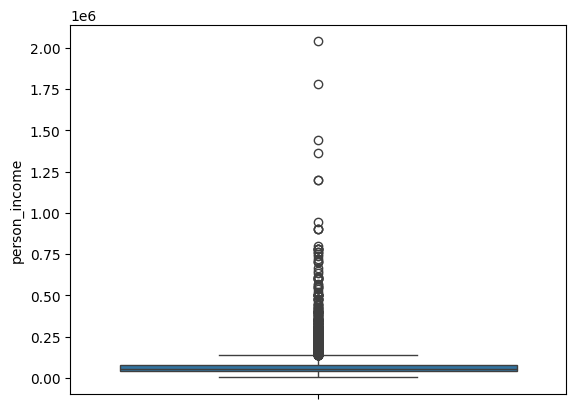

In [18]:
sns.boxplot(df['person_income'])

There are many outliers in this feature but we will not treat this as the income of a person can be high or low .

<Axes: ylabel='person_emp_length'>

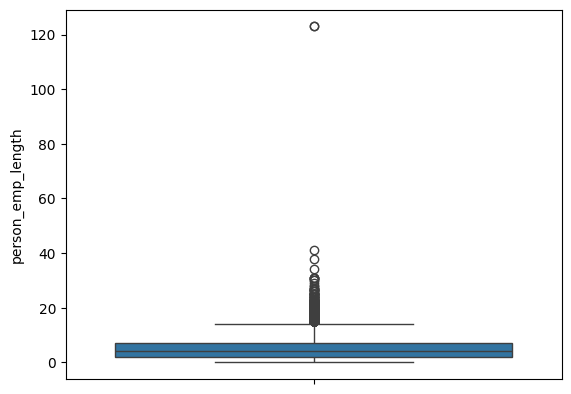

In [19]:
sns.boxplot(df['person_emp_length'])

There is an outlier in the data whoch shows the year of employment as 120 which is not practically possible.Hence we will drop this row.

In [20]:
df[df['person_emp_length']>120]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [21]:
df=df.drop(df[df['person_emp_length']>120].index)

<Axes: ylabel='loan_amnt'>

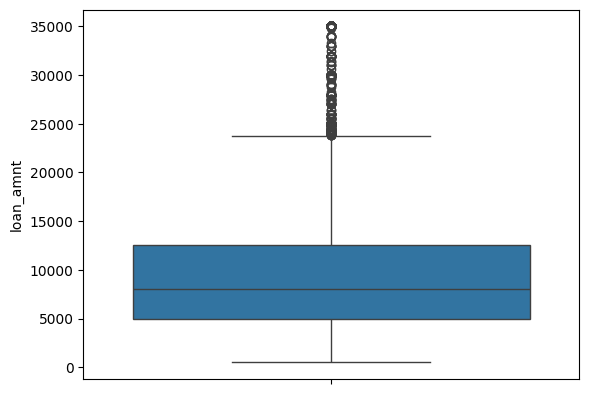

In [22]:
sns.boxplot(df['loan_amnt'])

We would not treat the outliers as the loan amount can be higher.

<Axes: ylabel='loan_int_rate'>

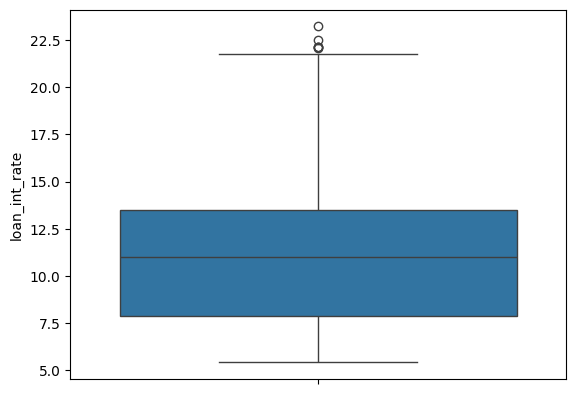

In [23]:
sns.boxplot(df['loan_int_rate'])

We would not treat the outliers as the intrest ranges fluctuates according to the different factors such as income,property etc.

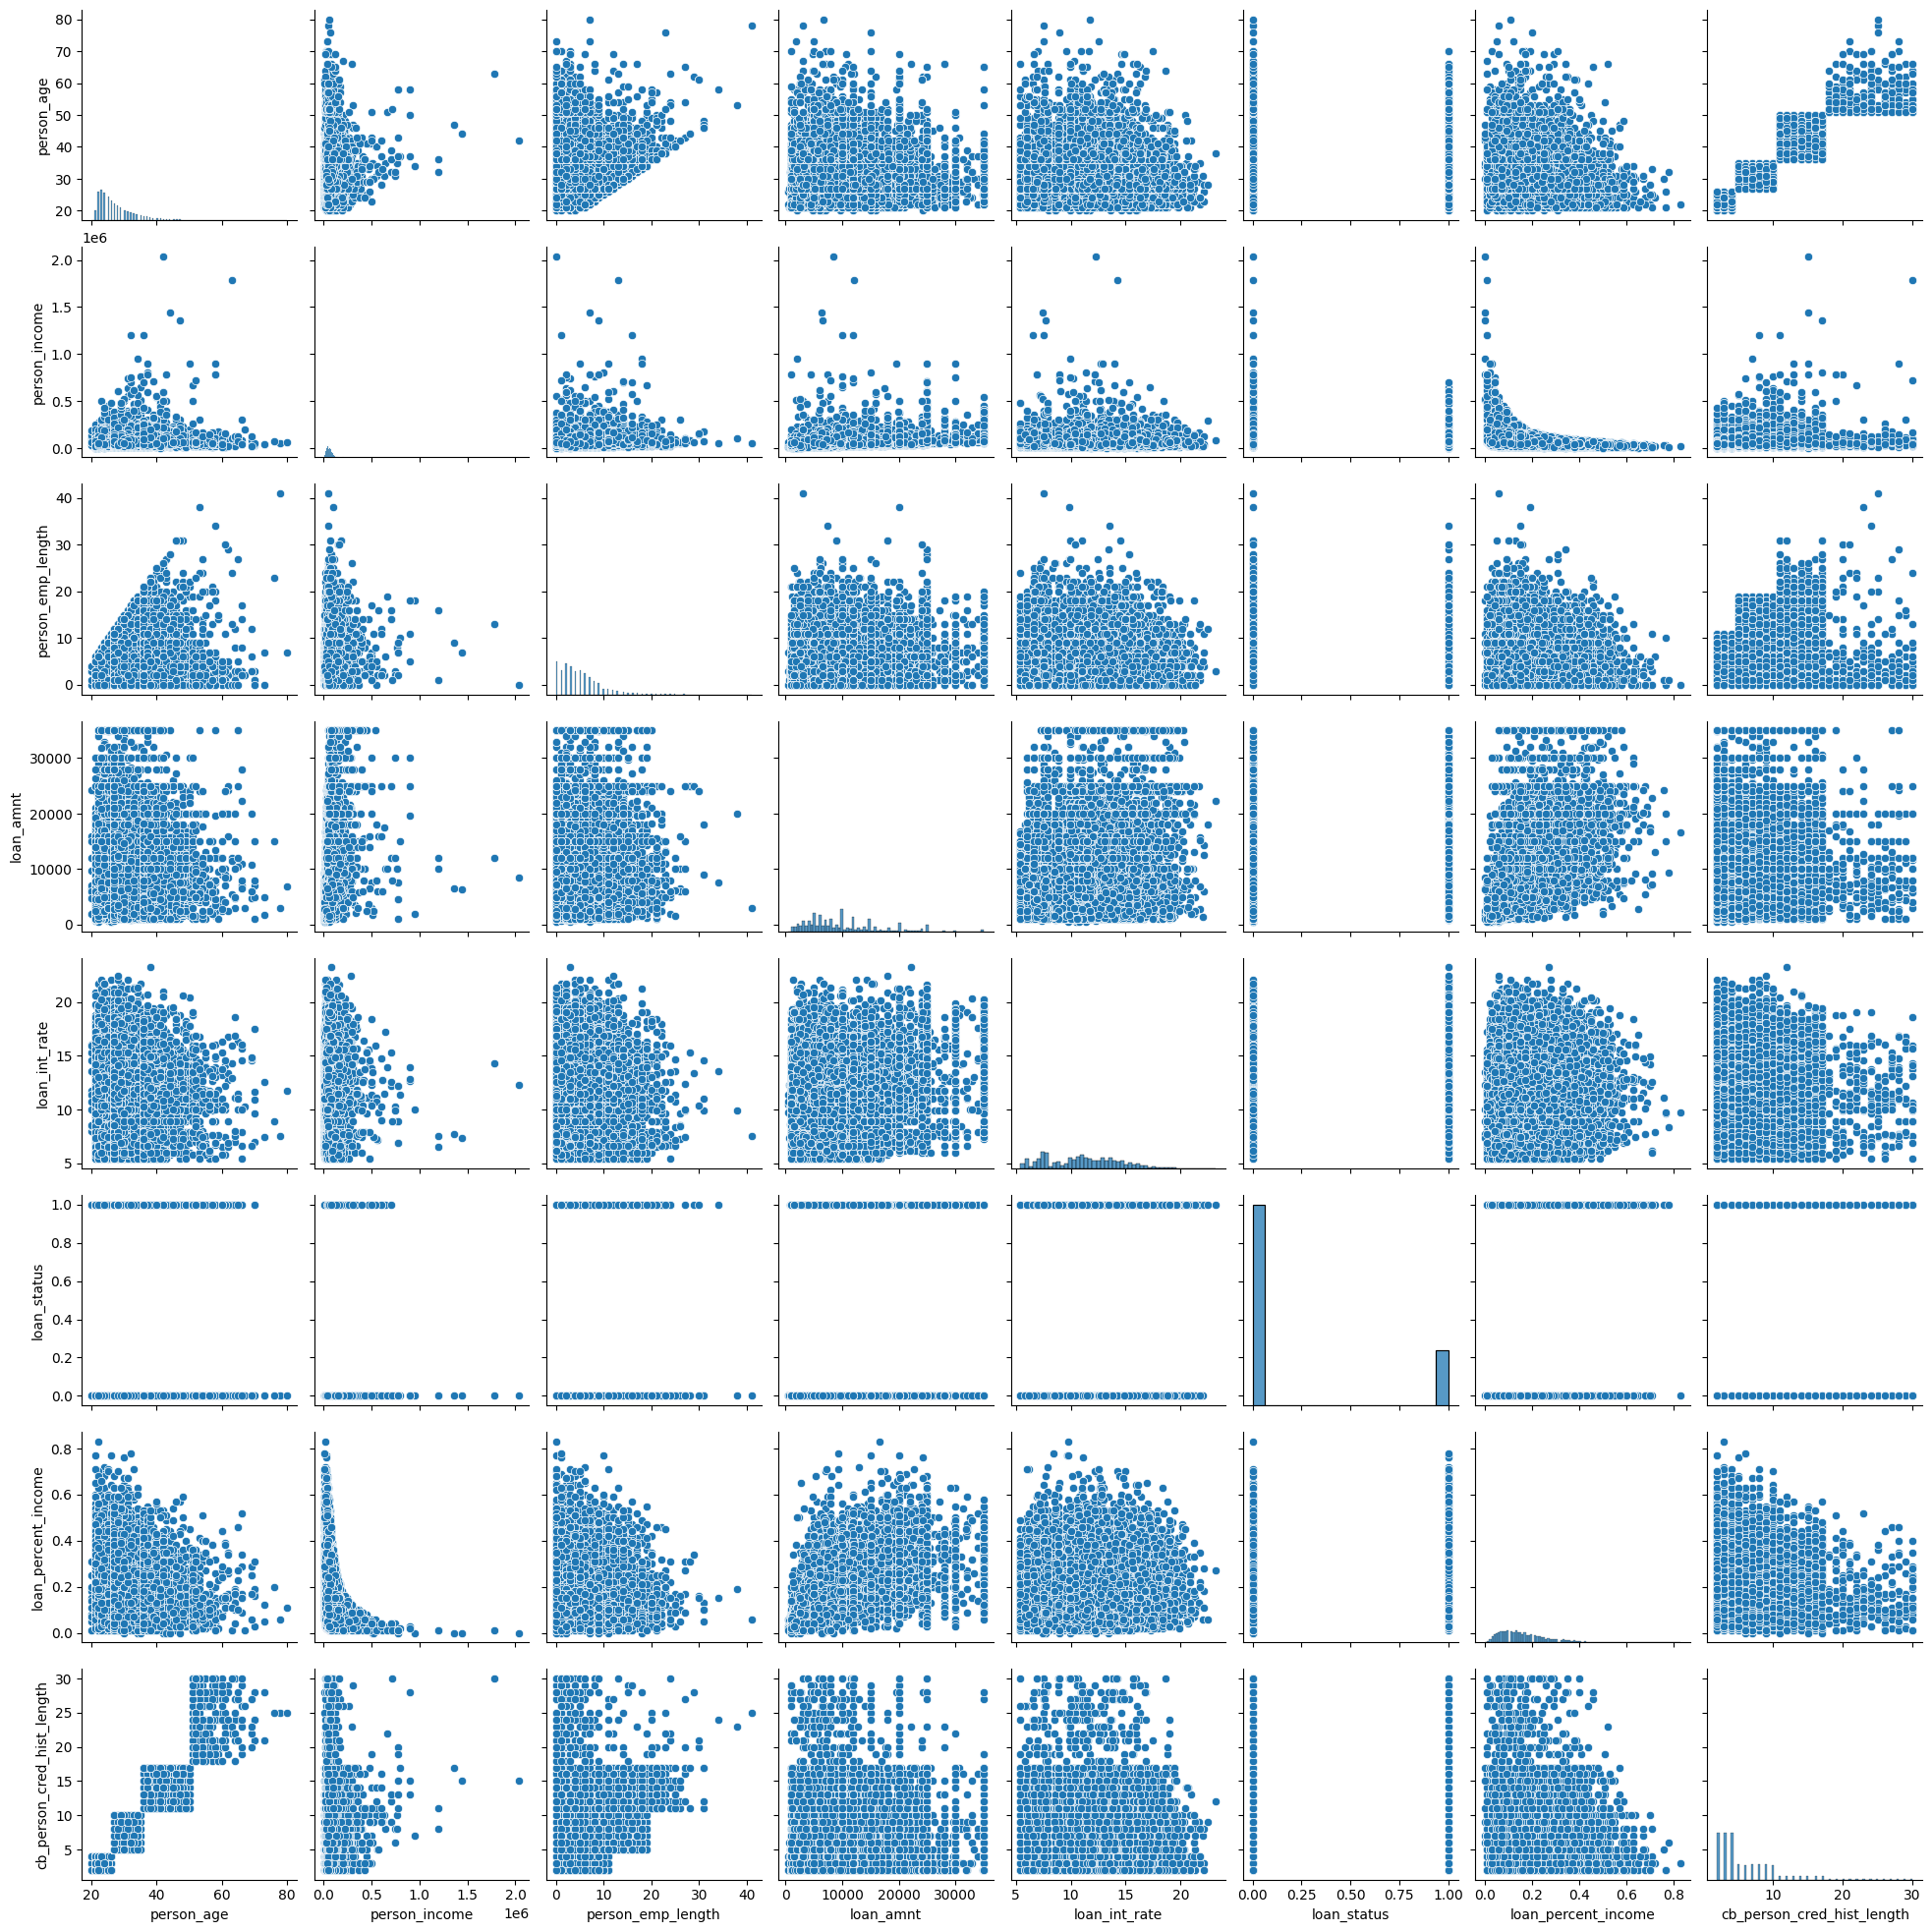

In [24]:
sns.pairplot(df)

From the above data we can say that the data is linear and is less noisy.Classification algorithims such as Naive Bayes,Logistical Regression,Support Vector Machine('Classifier') and Decision Tree can be used.

In [25]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [26]:
# Label encoding all the categorical columns
df['person_home_ownership']=le.fit_transform(df['person_home_ownership'])
df['loan_intent']=le.fit_transform(df['loan_intent'])
df['loan_grade']=le.fit_transform(df['loan_grade'])
df['cb_person_default_on_file']=le.fit_transform(df['cb_person_default_on_file'])

In [27]:
df['loan_status'].value_counts()

loan_status
0    22429
1     6202
Name: count, dtype: int64

The data has 22429 outcomes of loan not being defaulted and 6202 outcomes of loans being defaulted.We would use the undersampling technique for achieveing the best accuracy.

# Model Selection

For the above dataset the following models should be used for prediction-

1) Logistical Regession-As the data is linear and the classification is binary we can use logistical regression for good accruacy.

2)Naive Bayes-As the data is linear and the classification is binary and also the data is of a small size we can use Naive Bayes for good accruacy.

3)Support Vector Machine-As the data is linear and binary classification, we can use SVM with linear kernels for good accruacy.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x=df.drop('loan_status',axis=1)
y=df['loan_status']

In [30]:
x

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.0,1,1,1000,11.14,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,0.55,1,4
5,21,9900,2,2.0,5,0,2500,7.14,0.25,0,2
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2,5800,13.16,0.11,0,30
32577,54,120000,0,4.0,4,0,17625,7.49,0.15,0,19
32578,65,76000,3,3.0,2,1,35000,10.99,0.46,0,28
32579,56,150000,0,5.0,4,1,15000,11.48,0.10,0,26


In [31]:
y

1        0
2        1
3        1
4        1
5        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 28631, dtype: int64

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123,stratify=y)

#Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
lr=LogisticRegression()

In [34]:
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred=lr.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred)

0.8114195914091147

In [37]:
confusion_matrix(y_test,y_pred)

array([[4424,   62],
       [1018,  223]])

Logistic Regression has given 81% accuracy for the above dataset.

# Naive Bayes

In [38]:
from  sklearn.naive_bayes import GaussianNB
gb=GaussianNB()

In [39]:
gb.fit(x_train,y_train)

GaussianNB()

In [40]:
y_pred=gb.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred)

0.8280076829055352

In [42]:
confusion_matrix(y_test,y_pred)

array([[4275,  211],
       [ 774,  467]])

Naive Bayes has given 82% accuracy for the above dataset.

# Support Vector Machine

In [45]:
x,y=nm.fit_resample(x,y)

In [46]:
x

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,36000,3,1.0,3,2,5000,13.22,0.14,0,4
1,24,30000,2,7.0,2,2,10000,12.61,0.33,0,3
2,24,30000,2,7.0,2,2,10000,12.61,0.33,1,2
3,25,30000,3,4.0,1,1,5000,11.86,0.17,0,2
4,23,36000,3,1.0,1,2,5000,14.79,0.14,0,2
...,...,...,...,...,...,...,...,...,...,...,...
12399,52,71520,3,0.0,1,4,7000,16.82,0.10,1,24
12400,57,40000,3,1.0,3,0,15000,8.90,0.38,0,21
12401,60,45600,3,1.0,5,1,20000,10.00,0.44,0,26
12402,52,65004,3,4.0,4,3,20000,15.58,0.31,1,19


In [48]:
y.value_counts()

loan_status
0    6202
1    6202
Name: count, dtype: int64

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123,stratify=y)

In [50]:
from sklearn.svm import SVC
svc=SVC()

In [51]:
svc=SVC(kernel='linear')

In [ ]:
svc.fit(x_train,y_train)

In [ ]:
y_pred=svc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)